# Employee Churn Prediction

The **goal** of this project is to make a model which can predict if an employee will leave a company, based on specific features. For this purpose, a series of different classification algorithms are being used.


## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Get the data

The data includes employee informations, such as the salary, the department, the duration of being at the company, etc.

In [93]:
employees = pd.read_csv('data/hr_train.csv')
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


## EDA and Preprocessing

In [3]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    10499 non-null  float64
 1   last_evaluation       10499 non-null  float64
 2   number_project        10499 non-null  int64  
 3   average_montly_hours  10499 non-null  int64  
 4   time_spend_company    10499 non-null  int64  
 5   Work_accident         10499 non-null  int64  
 6   left                  10499 non-null  int64  
 7   promotion             10499 non-null  int64  
 8   sales                 10499 non-null  object 
 9   salary                10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB


In [4]:
# for simplicity, i rename the sales column
employees.rename(columns={'sales':'department'},inplace=True)

In [5]:
employees.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,department,salary
count,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499,10499
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935,5104
mean,0.612683,0.717131,3.808553,201.059815,3.494238,0.144299,0.292885,0.021716,NaN,NaN
std,0.248578,0.171483,1.230572,49.959332,1.453227,0.351410,0.455108,0.145763,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,1.000000,0.000000,NaN,NaN


Let's summarize the data per department

In [6]:
employees.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion
department,,,,,,,,
IT,0.610194,0.719212,3.876364,203.168485,3.488485,0.121212,0.275152,0.002424
RandD,0.617358,0.713453,3.835849,200.113208,3.379245,0.169811,0.252830,0.039623
accounting,0.568349,0.716091,3.853890,202.396584,3.445920,0.123340,0.343454,0.013283
hr,0.600244,0.707556,3.625940,197.298872,3.347744,0.122180,0.330827,0.018797
management,0.617761,0.725078,3.855876,196.984479,4.356984,0.155211,0.226164,0.115299
marketing,0.612687,0.717427,3.661238,199.504886,3.545603,0.153094,0.317590,0.050489
product_mng,0.625133,0.717199,3.780908,201.600939,3.491393,0.154930,0.278560,0.000000
sales,0.617148,0.710453,3.797615,201.276661,3.532538,0.144123,0.291312,0.024872
support,0.620861,0.726015,3.793059,201.250643,3.374036,0.152956,0.291131,0.008997


* It seems that employees who work in `management` tend to spend more years at the company.
* Consequently, they have the least 'churn rate' compared to other employees .
* They also spend less hours (on average) per month, than the others. 
* Finally, it seems that is more probable to get a promotion, than the others

Let's visualize the satisfaction level per department and salary

<AxesSubplot:xlabel='department', ylabel='salary'>

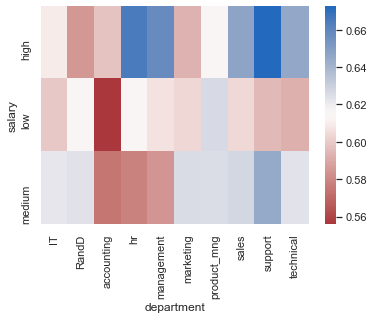

In [7]:
sns.heatmap(pd.pivot_table(data=employees,index=employees['salary'],columns=employees['department'],values='satisfaction_level'),cmap='vlag_r')

* It seems that the lowest `satisfaction_level` have the employees who work in `accounting` and have low `salary`
* Moreover, the employees who have high `salary` also have the highest `satisfaction_level` , as expected.

Let's explore the `time_spend_company` column

<AxesSubplot:ylabel='time_spend_company'>

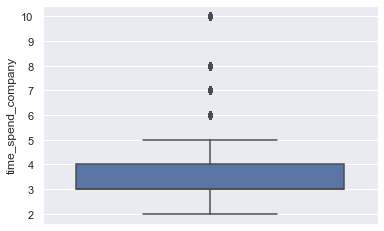

In [8]:
sns.boxplot(y='time_spend_company',data=employees)

As we can clearly see, there are some outliers

In [9]:
outliers = employees[employees['time_spend_company'] > 5]['left'].value_counts(normalize=True)
outliers

0    0.760626
1    0.239374
Name: left, dtype: float64

Let's explore them

Text(0.5, 1.0, 'Employees with 5+ years at company')

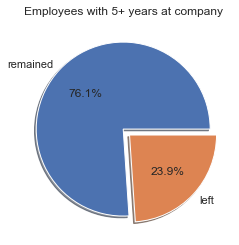

In [10]:
outliers.plot.pie(labels=['remained','left'],explode=[0,0.1],shadow=True,autopct='%1.1f%%',ylabel='')
plt.title('Employees with 5+ years at company')

As an insight, the majority of employees with 5+ years at the company tend to remain.

Filter the outliers

In [11]:
employees_without_outliers = employees[employees['time_spend_company'] <= 5]
employees_without_outliers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,department,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,technical,low
10495,0.85,0.81,3,205,3,0,0,0,marketing,high
10496,0.32,0.95,5,172,2,0,1,0,sales,low
10497,0.51,0.76,4,140,3,0,1,0,support,low


Now, let's group them by department.

In [12]:
grouped_by_dep = employees_without_outliers.groupby('department').mean()
grouped_by_dep

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion
department,,,,,,,,
IT,0.607049,0.721555,3.872200,203.548090,3.184453,0.113307,0.287220,0.002635
RandD,0.629696,0.716673,3.813387,200.365112,3.158215,0.168357,0.255578,0.040568
accounting,0.566345,0.712410,3.845382,201.829317,3.228916,0.128514,0.353414,0.010040
hr,0.599639,0.704469,3.607214,195.839679,3.152305,0.120240,0.326653,0.006012
management,0.610749,0.724524,3.904899,197.657061,3.141210,0.138329,0.250720,0.066282
marketing,0.612681,0.713768,3.637681,198.902174,3.166667,0.143116,0.320652,0.047101
product_mng,0.623867,0.715554,3.735945,201.802385,3.177172,0.153322,0.272572,0.000000
sales,0.614600,0.709589,3.767170,200.425283,3.153585,0.141887,0.301132,0.023396
support,0.618836,0.724082,3.786301,200.768493,3.141096,0.145205,0.287671,0.008904


<AxesSubplot:xlabel='department', ylabel='left'>

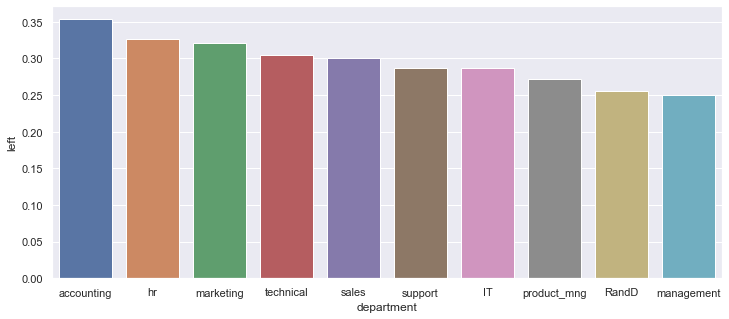

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(x=grouped_by_dep.index,y=grouped_by_dep['left'],order=grouped_by_dep.sort_values('left',ascending=False).index)

* On average, employees who work in `accounting` department, tend to leave the company compared to others

Let's explore the Average Montly Hours per department and salary.

Text(0.5, 1.0, 'Average Montly Hours per department/salary')

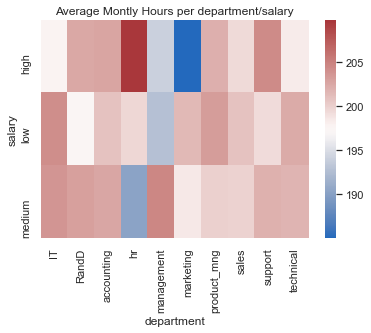

In [14]:
sns.heatmap(pd.pivot_table(data=employees_without_outliers,index=employees_without_outliers['salary'],columns=employees_without_outliers['department'],values='average_montly_hours'),cmap='vlag')
plt.title('Average Montly Hours per department/salary')

* It seems that the employees in `marketing` with high `salary`, have the lowest workload. (on average)
* By contrast, employees in `HR` with high `salary`, have the largest workload. (on average)

Let's explore the Average Work accident per department and salary.

Text(0.5, 1.0, 'Average Work accident per department/salary')

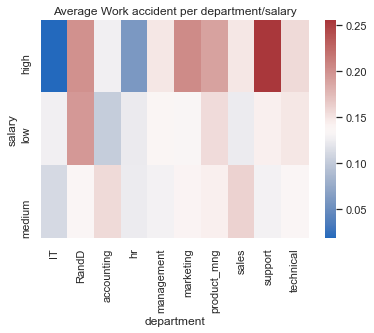

In [15]:
sns.heatmap(pd.pivot_table(data=employees_without_outliers,index=employees_without_outliers['salary'],columns=employees_without_outliers['department'],values='Work_accident'),cmap='vlag')
plt.title('Average Work accident per department/salary')

* It seems that , on average, employees in `IT` and `HR` departments with high `salary` do not have as many work accidents as the others
* On the other hand, employees in `Support` department with high `salary` tend to have the majority of the accidents

Let's explore the Average Satisfaction Level per department and salary.

Text(0.5, 1.0, 'Average Satisfaction Level per department/salary')

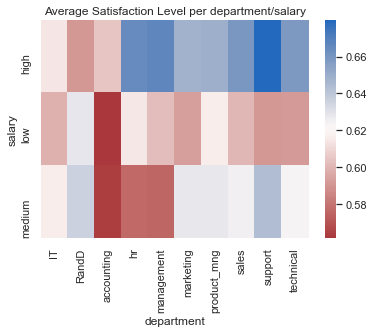

In [16]:
sns.heatmap(pd.pivot_table(data=employees_without_outliers,index=employees_without_outliers['salary'],columns=employees_without_outliers['department'],values='satisfaction_level'),cmap='vlag_r')
plt.title('Average Satisfaction Level per department/salary')

* It seems that the majority of employees who have high `salary` tend to be more satisfied than the others
* On the other hand, employees with low `salary` tend to have lower satisfaction level

Let's explore the Average Leave per department and salary.

Text(0.5, 1.0, 'Average Leave per department/salary')

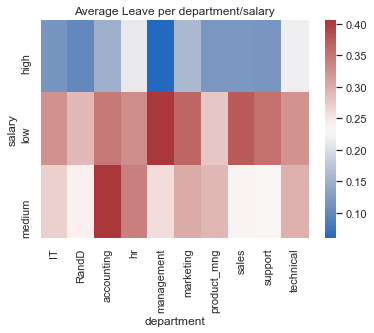

In [17]:
sns.heatmap(pd.pivot_table(data=employees_without_outliers,index=employees_without_outliers['salary'],columns=employees_without_outliers['department'],values='left'),cmap='vlag')
plt.title('Average Leave per department/salary')

* It seems that employees with high `salary` tend to leave the company less frequently than the others
* On the other hand, employees with low `salary` tend to leave the company more frequently than the others

### Dealing with categorical features

In [18]:
# See the different values for each categorical column
for col in employees_without_outliers.select_dtypes('object').columns.values:
    print(employees_without_outliers[col].value_counts())
    print('==========================================')

sales          2650
technical      1760
support        1460
IT              759
product_mng     587
marketing       552
hr              499
accounting      498
RandD           493
management      347
Name: department, dtype: int64
low       4772
medium    4083
high       750
Name: salary, dtype: int64


In [19]:
# Apply One-Hot Encoding to the 'department' column
employees_without_outliers = pd.concat([employees_without_outliers,pd.get_dummies(employees_without_outliers['department'],drop_first=True,prefix='dep')],axis=1)
employees_without_outliers.drop('department',axis=1,inplace=True)

In [20]:
# 'Salary' column is ordinal , so i will do a Label Encoding
employees_without_outliers['salary'] = employees_without_outliers['salary'].map({'low':0,'medium':1,'high':2})

# reset the index
employees_cleaned = employees_without_outliers.reset_index()

In [21]:
employees_cleaned.drop('index',axis=1,inplace=True)
employees_cleaned

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,salary,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.42,0.46,2,150,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.66,0.77,2,171,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0.55,0.49,5,240,3,0,0,0,2,0,0,0,0,0,0,0,0,1
3,0.22,0.88,4,213,3,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0.20,0.72,6,224,4,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0.82,0.84,3,237,2,0,0,0,0,0,0,0,0,0,0,0,0,1
9601,0.85,0.81,3,205,3,0,0,0,2,0,0,0,0,1,0,0,0,0
9602,0.32,0.95,5,172,2,0,1,0,0,0,0,0,0,0,0,1,0,0
9603,0.51,0.76,4,140,3,0,1,0,0,0,0,0,0,0,0,0,1,0


### Declare the features and the target

In [22]:
x = employees_cleaned.drop('left',axis=1)
y = employees_cleaned['left']

### Scale the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
x.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,salary,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
count,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000
mean,0.611668,0.715831,3.788756,200.708485,3.163977,0.140864,0.017699,0.581260,0.051327,0.051848,0.051952,0.036127,0.057470,0.061114,0.275898,0.152004,0.183238
std,0.248012,0.170928,1.242402,49.903939,0.910210,0.347899,0.131862,0.632145,0.220676,0.221732,0.221942,0.186616,0.232751,0.239552,0.446989,0.359044,0.386882
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,198.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Select the appropriate columns for scaling
col_to_be_scaled = ['number_project','average_montly_hours','time_spend_company','salary']

In [26]:
scaler = StandardScaler()
scaler.fit(x.loc[:,col_to_be_scaled])

x.loc[:,col_to_be_scaled] = scaler.transform(x.loc[:,col_to_be_scaled])
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,salary,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.42,0.46,-1.439831,-1.016175,-0.180162,0,0,0.662446,0,0,0,0,0,0,1,0,0
1,0.66,0.77,-1.439831,-0.595344,-1.278868,0,0,0.662446,0,0,0,0,0,0,0,0,1
2,0.55,0.49,0.974972,0.787384,-0.180162,0,0,2.244445,0,0,0,0,0,0,0,0,1
3,0.22,0.88,0.170038,0.246316,-0.180162,1,0,0.662446,0,0,0,0,0,0,0,0,1
4,0.20,0.72,1.779906,0.466751,0.918543,0,0,0.662446,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0.82,0.84,-0.634896,0.727265,-1.278868,0,0,-0.919552,0,0,0,0,0,0,0,0,1
9601,0.85,0.81,-0.634896,0.086000,-0.180162,0,0,2.244445,0,0,0,0,1,0,0,0,0
9602,0.32,0.95,0.974972,-0.575305,-1.278868,0,0,-0.919552,0,0,0,0,0,0,1,0,0
9603,0.51,0.76,0.170038,-1.216570,-0.180162,0,0,-0.919552,0,0,0,0,0,0,0,1,0


In [27]:
x.describe().applymap('{:,.2f}'.format)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,salary,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
count,"9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00","9,605.00"
mean,0.61,0.72,0.00,0.00,0.00,0.14,0.02,-0.00,0.05,0.05,0.05,0.04,0.06,0.06,0.28,0.15,0.18
std,0.25,0.17,1.00,1.00,1.00,0.35,0.13,1.00,0.22,0.22,0.22,0.19,0.23,0.24,0.45,0.36,0.39
min,0.09,0.36,-1.44,-2.10,-1.28,0.00,0.00,-0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.44,0.56,-0.63,-0.90,-0.18,0.00,0.00,-0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.64,0.72,0.17,-0.05,-0.18,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.81,0.87,0.97,0.89,0.92,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,1.00,1.00,2.58,2.19,2.02,1.00,1.00,2.24,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Train - Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7684, 17) (7684,) (1921, 17) (1921,)


## Train different classification algorithms

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

As we can see below, the dataset is unbalanced. Therefore we have to tackle this issue, by assigning the appropriate weights to each class.

In [31]:
y.value_counts() 

0    6744
1    2861
Name: left, dtype: int64

* Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(class_weight='balanced')

logr.fit(x_train,y_train)

pred = logr.predict(x_test)

logr_sc = logr.score(x_test,y_test)
logr_sc

0.7423217074440396

In [33]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[996 363]
 [132 430]]               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1359
           1       0.54      0.77      0.63       562

    accuracy                           0.74      1921
   macro avg       0.71      0.75      0.72      1921
weighted avg       0.78      0.74      0.75      1921



* Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')

dtc.fit(x_train,y_train)

pred = dtc.predict(x_test)

dtc_sc = dtc.score(x_test,y_test)
dtc_sc

0.797501301405518

In [35]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1140  219]
 [ 170  392]]               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1359
           1       0.64      0.70      0.67       562

    accuracy                           0.80      1921
   macro avg       0.76      0.77      0.76      1921
weighted avg       0.80      0.80      0.80      1921



* Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,class_weight='balanced')

rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)

rfc_sc = rfc.score(x_test,y_test)
rfc_sc

0.8807912545549194

In [37]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1303   56]
 [ 173  389]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1359
           1       0.87      0.69      0.77       562

    accuracy                           0.88      1921
   macro avg       0.88      0.83      0.85      1921
weighted avg       0.88      0.88      0.88      1921



* XGBOOST Classifier

In [38]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(scale_pos_weight = 2.36)

xgbc.fit(x_train,y_train)

pred = xgbc.predict(x_test)

xgbc_sc = xgbc.score(x_test,y_test)
xgbc_sc

[12:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8656949505465903

In [39]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1263   96]
 [ 162  400]]               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1359
           1       0.81      0.71      0.76       562

    accuracy                           0.87      1921
   macro avg       0.85      0.82      0.83      1921
weighted avg       0.86      0.87      0.86      1921



* Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(x_train,y_train)

pred = bnb.predict(x_test)

bnb_sc = bnb.score(x_test,y_test)
bnb_sc

0.7188964081207704

In [41]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1259  100]
 [ 440  122]]               precision    recall  f1-score   support

           0       0.74      0.93      0.82      1359
           1       0.55      0.22      0.31       562

    accuracy                           0.72      1921
   macro avg       0.65      0.57      0.57      1921
weighted avg       0.69      0.72      0.67      1921



* KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

knn_sc = knn.score(x_test,y_test)
knn_sc

0.8511192087454451

In [43]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1250  109]
 [ 177  385]]               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1359
           1       0.78      0.69      0.73       562

    accuracy                           0.85      1921
   macro avg       0.83      0.80      0.81      1921
weighted avg       0.85      0.85      0.85      1921



* Support Vector Classifier

In [44]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

svc.fit(x_train,y_train)

pred = svc.predict(x_test)

svc_sc = svc.score(x_test,y_test)
svc_sc

0.8604893284747527

In [45]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1252  107]
 [ 161  401]]               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1359
           1       0.79      0.71      0.75       562

    accuracy                           0.86      1921
   macro avg       0.84      0.82      0.83      1921
weighted avg       0.86      0.86      0.86      1921



* Artificial Neural Network

In [46]:
import tensorflow as tf

In [47]:
# Declare some constants
input_layer_size = 17
hidden_layer_size = 50
output_layer_size = 2

In [48]:
model = tf.keras.Sequential([
                tf.keras.layers.Dense(input_layer_size,activation='relu'),
                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                tf.keras.layers.Dense(output_layer_size,activation='softmax')
])

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
EPOCHS = 200
batch_size = 50

In [51]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=EPOCHS,verbose=2,class_weight={0:0.71,1:1.68})

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

154/154 - 0s - loss: 0.5695 - accuracy: 0.7130
Epoch 2/200
154/154 - 0s - loss: 0.4879 - accuracy: 0.8145
Epoch 3/200
154/154 - 0s - loss: 0.4743 - accuracy: 0.8261
Epoch 4/200
154/154 - 0s - loss: 0.4684 - accuracy: 0.8289
Epoch 5/200
154/154 - 0s - loss: 0.4643 - accuracy: 0.8304
Epoch 6/200
154/154 - 0s - loss: 0.4583 - accuracy: 0.8358
Epoch 7/200
154/154 - 0s - loss: 0.4561 - accuracy: 0.8352
Epoch 8/200
154/154 - 0s - loss: 0.4507 - accuracy: 0.8384
Epoch 9/200
154/154 - 0s - loss: 0.4

In [52]:
# Get the predictions for the test data
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Evaluation

In [53]:
ann_sc = model.evaluate(x_test,y_test)
ann_sc[1]

61/61 [==============================] - 0s 392us/step - loss: 0.5577 - accuracy: 0.8183


0.8183237910270691

In [54]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[1163  196]
 [ 153  409]]               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1359
           1       0.68      0.73      0.70       562

    accuracy                           0.82      1921
   macro avg       0.78      0.79      0.79      1921
weighted avg       0.82      0.82      0.82      1921



## Overall Comparison

Let's create a dataframe, containing the performance of each model

In [55]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','XGBoost Classifier','Naive Bayes Classifier','KNN Classifier','Support Vector Classifier','ANN']

In [56]:
accuracy_df = pd.DataFrame(index=models,data=[logr_sc,dtc_sc,rfc_sc,xgbc_sc,bnb_sc,knn_sc,svc_sc,ann_sc[1]],columns=['Accuracy']).sort_values(by='Accuracy',ascending=False)
accuracy_df

,Accuracy
Random Forest Classifier,0.880791
XGBoost Classifier,0.865695
Support Vector Classifier,0.860489
KNN Classifier,0.851119
ANN,0.818324
Decision Tree Classifier,0.797501
Logistic Regression,0.742322
Naive Bayes Classifier,0.718896


### Conclusion

 As we can see the best model is the Random Forest Classifier with 88% accuracy.

### Appendix

Predict the churn rate for a new employee

In [57]:
def test_prediction(ls):
    """Applying scaling and getting the prediction for a new employee"""
    df_pred = pd.DataFrame(columns=x.columns)
    df_pred.loc[0] = ls
    df_pred.loc[0,col_to_be_scaled] = scaler.transform([df_pred.loc[0,col_to_be_scaled]])
    return rfc.predict_proba([df_pred.loc[0]])

In [58]:
test_prediction([0.22,0.46,2,150,3,0,0,1,0,0,0,0,0,0,1,0,0])

array([[0.5908104, 0.4091896]])

According to the model, there is a 59% probalility that this employee won't leave the company

In [92]:
test_prediction([0.2,0.72,6,224,4,0,0,1,0,0,0,0,0,0,0,0,1])

array([[0.275, 0.725]])

According to the model, there is a 73% probalility that this employee will leave the company